In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor as NN
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import pylab as pl
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv("hpdemo.csv", index_col = "ID")
df.head()

,east,north,price,fl_area
ID,,,,
1,523800,179700,107000,50
2,533200,170900,55500,66
3,514600,175800,103000,90
4,516000,171000,187000,125
5,533700,169200,43000,50


In [3]:
(df.shape,df.info())[0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1405 entries, 1 to 1405
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   east     1405 non-null   int64
 1   north    1405 non-null   int64
 2   price    1405 non-null   int64
 3   fl_area  1405 non-null   int64
dtypes: int64(4)
memory usage: 54.9 KB


(1405, 4)

In [4]:
target = df['price']/1000
df.drop(['price'], axis = 1, inplace = True)

In [5]:
mae = make_scorer(mean_absolute_error, greater_is_better=False)

In [6]:
pipe = Pipeline([('zscores', MinMaxScaler()),
                 ('NNreg',NN())])

model_cv = GridSearchCV(
    estimator = pipe,
    scoring = mae,
    param_grid = {
        'NNreg__n_neighbors':range(1,25),
        'NNreg__weights':['uniform','distance'],
        'NNreg__p':[1,2],
        'NNreg__algorithm': ['kd_tree','ball_tree','brute']})

model_cv.fit(df, target);

In [7]:
def surf3d(pipe_model,fl_area):
    east_mesh, north_mesh = np.meshgrid(
        np.linspace(505000,555800,100),
        np.linspace(158400,199900,100))
    
    fl_mesh = np.zeros_like(east_mesh)
    fl_mesh[:,:] = fl_area
    
    grid_predictor_vars = np.array([east_mesh.ravel(),
        north_mesh.ravel(),fl_mesh.ravel()]).T
    hp_pred = pipe_model.predict(grid_predictor_vars)
    hp_mesh = hp_pred.reshape(east_mesh.shape)
    
    fig = pl.figure()
    ax = Axes3D(fig)
    ax.plot_surface(east_mesh, north_mesh, hp_mesh, 
        rstride=1, cstride=1, cmap='YlOrBr',lw=0.01)
    
    ax.set_xlabel('Easting')
    ax.set_ylabel('Northing')
    ax.set_zlabel('Price at Floor Area: $%dm^2$' % fl_area)
    pl.show()
    return

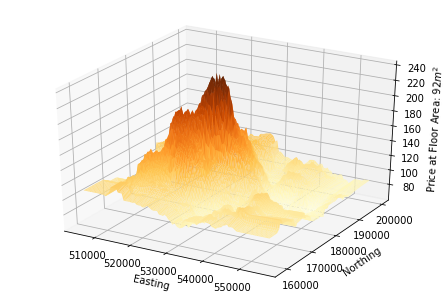

In [8]:
surf3d(model_cv, df['fl_area'].mean())

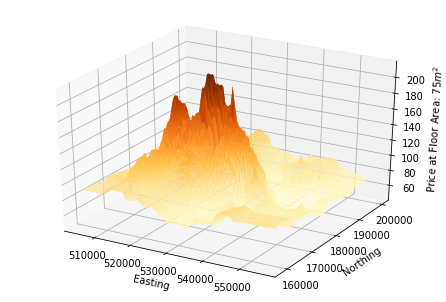

In [9]:
surf3d(model_cv, 75)

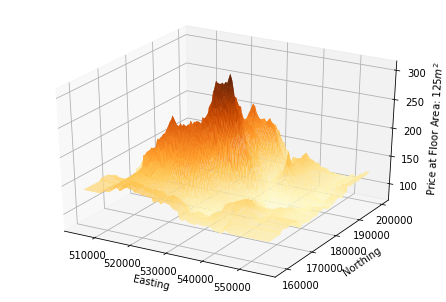

In [10]:
surf3d(model_cv, 125)